In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

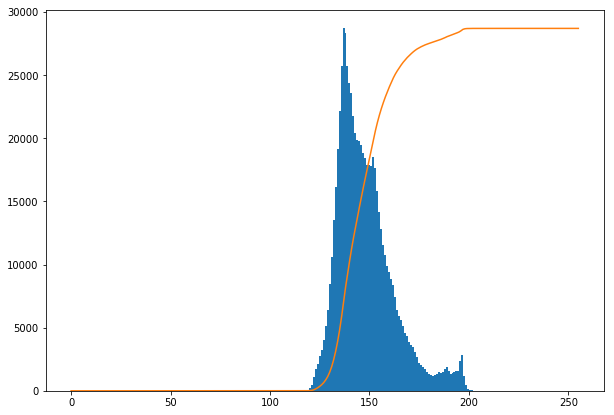

In [2]:
img1 = imread('img.png')
plt.figure(figsize = (10, 7))
h1 = plt.hist(img1.ravel(), bins = 256, range=(0,255))[0];
cdf1 = np.cumsum(h1)
plt.plot(range(len(h1)), cdf1 / cdf1.max() * h1.max());

1.0

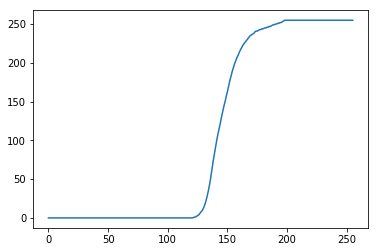

In [9]:
cdf_min = np.min(cdf1[np.where(cdf1 != 0)])
N = img1.shape[0] * img1.shape[1]
cdf_new = np.round((cdf1 - cdf_min) / (N - 1) * 255)
plt.plot(range(256), cdf_new)

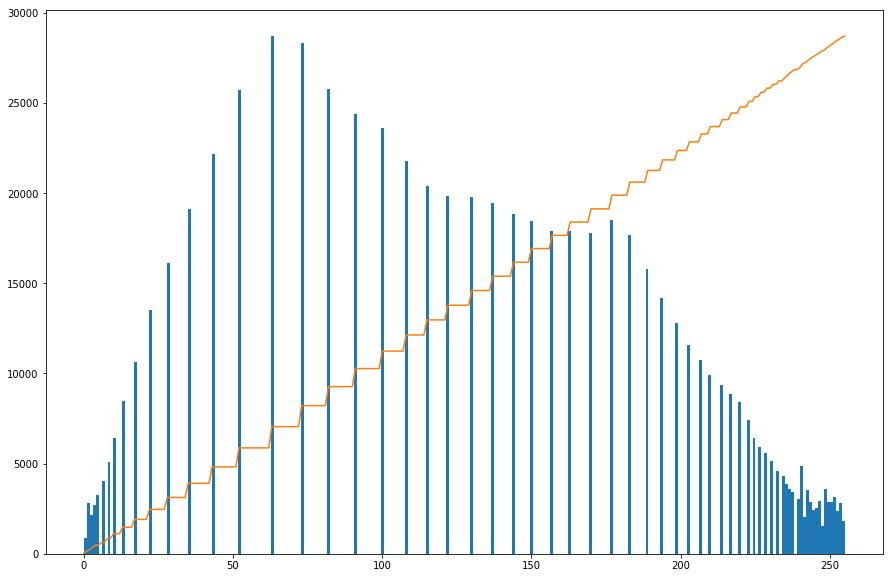

In [46]:
cdf_min = np.min(cdf1[np.where(cdf1 != 0)])
N = img1.shape[0] * img1.shape[1]
img2 = img1.copy()
for it_1 in np.arange(img.shape[0]):
    for it_2 in np.arange(img.shape[1]):
        img2[it_1,it_2] = np.round((cdf1[img[it_1,it_2]] - cdf_min) / (N - 1) * 255)
plt.figure(figsize = (15, 10))
h2 = plt.hist(img2.ravel(), bins = 256, range=(0,255))[0];
cdf2 = np.cumsum(h2)
plt.plot(range(len(h)), cdf2 / cdf2.max() * h2.max());

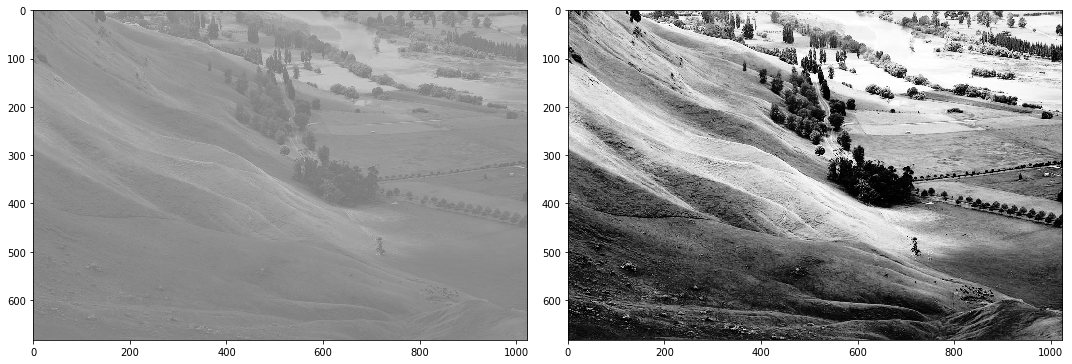

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(121)
imshow(img);
plt.subplot(122)
imshow(img2);

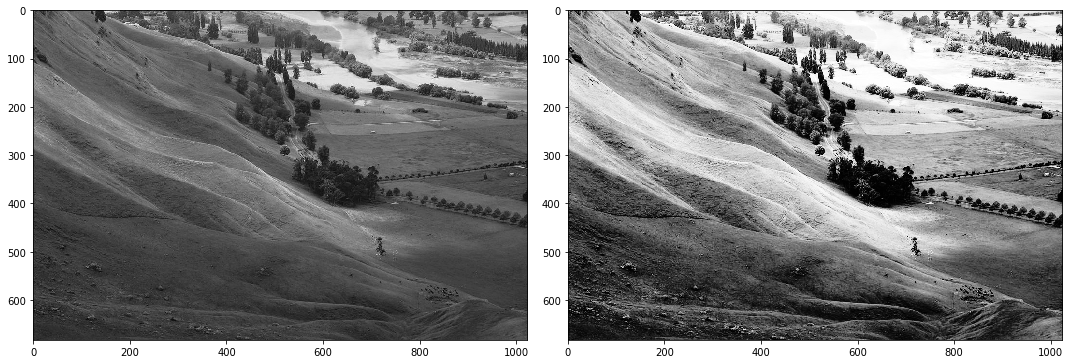

In [55]:
x_min = np.min(np.where(h1 != 0))
x_max = np.max(np.where(h1 != 0))
img3 = np.clip(255 / (x_max - x_min) * (img1 - x_min), 0, 255)
plt.figure(figsize=(15, 10))
plt.subplot(121)
imshow(img3.astype('uint8'))
plt.subplot(122)
imshow(img2);

dtype('float64')